In [1]:
!python -m pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.0
    Uninstalling pip-25.0:
      Successfully uninstalled pip-25.0


In [2]:
!pip install matplotlib seaborn

In [3]:
!pip install scikit-learn

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [5]:
# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Partition the data into an 80% training set and a 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [10]:
# Function to evaluate models and display their confusion matrix
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=data.target_names))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()
    
    return {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-Score": f1}

KNN Performance:
Accuracy:  0.9561
Precision: 0.9589
Recall:    0.9722
F1-Score:  0.9655

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



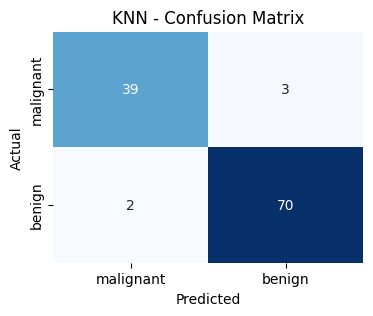

In [11]:
metrics_knn = evaluate_model(y_test, y_pred_knn, "KNN")

Decision Tree Performance:
Accuracy:  0.9123
Precision: 0.9559
Recall:    0.9028
F1-Score:  0.9286

Classification Report:
              precision    recall  f1-score   support

   malignant       0.85      0.93      0.89        42
      benign       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



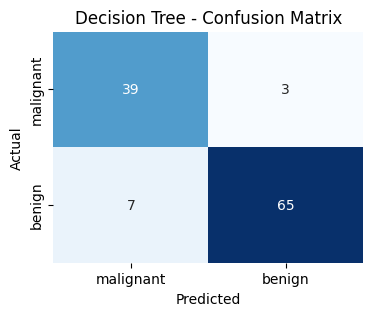

In [12]:
metrics_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")

Random Forest Performance:
Accuracy:  0.9561
Precision: 0.9589
Recall:    0.9722
F1-Score:  0.9655

Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



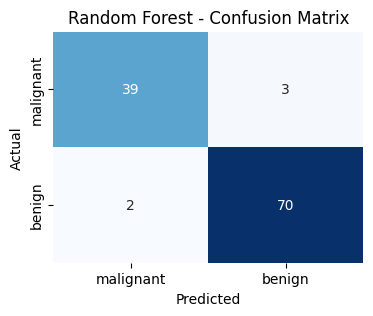

In [13]:
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

In [14]:
# Summarize all results in a DataFrame for comparison
results_df = pd.DataFrame({
    "KNN": metrics_knn,
    "Decision Tree": metrics_dt,
    "Random Forest": metrics_rf
})
results_df = results_df.transpose()
print(results_df)

               Accuracy  Precision    Recall  F1-Score
KNN            0.956140   0.958904  0.972222  0.965517
Decision Tree  0.912281   0.955882  0.902778  0.928571
Random Forest  0.956140   0.958904  0.972222  0.965517


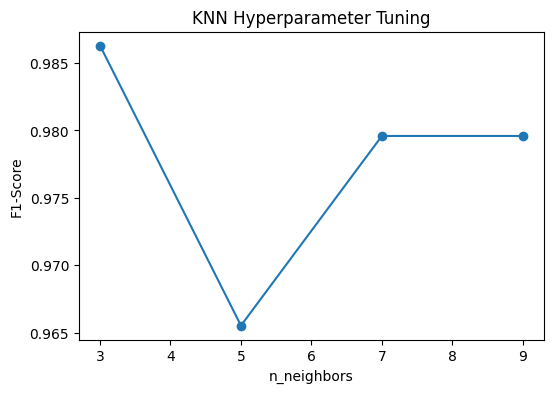

In [ ]:
# Ablation Study: Tuning n_neighbors for KNN
neighbors = [3, 5, 7, 9]
knn_results = {}

for k in neighbors:
    knn_tune = KNeighborsClassifier(n_neighbors=k)
    knn_tune.fit(X_train_scaled, y_train)
    y_pred_tune = knn_tune.predict(X_test_scaled)
    knn_results[k] = f1_score(y_test, y_pred_tune)

plt.figure(figsize=(6, 4))
plt.plot(neighbors, list(knn_results.values()), marker='o')
plt.xlabel("n_neighbors")
plt.ylabel("F1-Score")
plt.title("KNN Hyperparameter Tuning")
plt.show()